In [1]:
from pylab import *
from scipy.io import wavfile
import numpy.fft as fft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

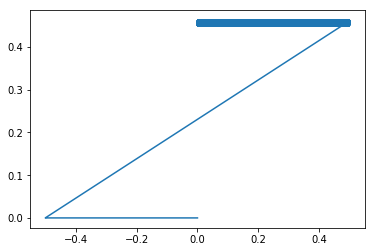

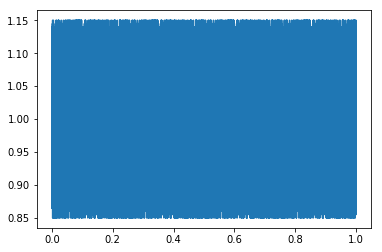

In [5]:
derivation = np.genfromtxt (r'C:\Users\Quirinus\iCloudDrive\Gimmicks/Random.txt', dtype=float) 
derivation = np.append(derivation, derivation)
derivation = np.append(derivation, derivation)

length = derivation.size
meander = 0.05

x = np.linspace(0, 1, length)
der = derivation[:length]*meander
signal_prime = np.ones(length)
signal = signal_prime + der

trans = fft.rfft(signal)
freq = fft.fftfreq(trans.size)
spectrum = abs(trans)
phase = np.angle(trans)

maskb = (spectrum>55)
spectrum[maskb] = 45
mask0 = (freq<0)
spectrum = np.sqrt(spectrum)/600 + np.ones(spectrum.size)*0.45
spectrum = spectrum
spectrum[mask0] = 0
# spectrum = np.sqrt(spectrum)/2 + np.ones(spectrum.size)*10
# spectrum = spectrum * 10000

plt.figure(1)
plt.plot(freq, spectrum)

plt.figure(2)
plt.plot(x, signal)

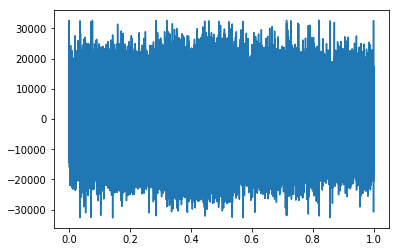

In [18]:
signal = fft.irfft(spectrum*np.exp(-1j*phase))*500000
mask = (abs(signal)>1000)
signal[mask] = signal[mask] /4
signal = signal*35
signal = signal.astype('i2')
x = linspace(0, 1, int(signal.size))
plt.figure('test')
plt.plot(x, signal)
plt.figure('phase')

In [13]:
sampfrq = 96000
wavfile.write(r'c:\users\quirinus\desktop\white.wav', sampfrq, signal)

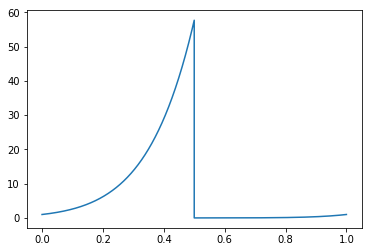

In [14]:
pinkfilter = np.power(np.ones(freq.size)+freq,10)
x=np.linspace(0, 1, pinkfilter.size)
plt.figure('filter')
plt.plot(x, pinkfilter)

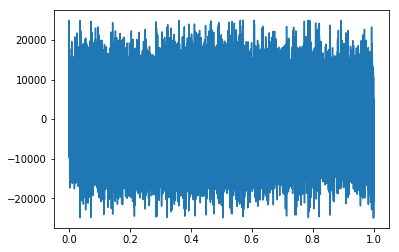

In [19]:
pinkt = spectrum/pinkfilter
signal = fft.irfft(pinkt*np.exp(-1j*phase))*50000000
mask = (abs(signal)>25000)
masks = (abs(signal)<1600)
signal[masks] = signal[masks]*4
signal[mask] = signal[mask]/7
signal = signal.astype('i2')
x = linspace(0, 1, int(signal.size))
plt.figure('testpink')
plt.plot(x, signal)

In [20]:
sampfrq = 96000
wavfile.write(r'c:\users\quirinus\desktop\pink.wav', sampfrq, signal)